## __A/B Testing with Seaborn's Dataset__
### Object:
Perform an A/B test to comparte the average tip amounts given on weekdays versus weekends and dermine if there's a significant difference between the two groups. 

## Steps: 
1. __Load the Data__ : Load the tips dataset from Seaborn.

2. __Data Exploration__: Explore the dataset to understand its structure and identify the groups for A/B testing. 

3. __Hypothesis Testing__: Using t-test to compate the means of the two groups. 

4. __Visualization__: Visualize the data to understand the distribution of tips between the groups.

5. __Interpretation__: Analyze the results to see if the difference is statistically significant. 

## __Step 1: Load the Data__

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

# Load the Tips dataset from Seaborn
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### Dataset Structure: The __tips__ dataset contains the following columns : 
    - total_bill: Total bill amount
    - tip: Tip amount given by the customer
    - sex: Gender of the customer
    - smoker: Whether the customer is a smoker or not
    - day: Day of the week (eg. Thurs, Fri, Sat, Sun)
    - time: Time of Day (Lunch or Dinner)
    - size: Size of the party (number of people at the table)
## __Step 2: Data Exploration__
For this A/B test, we'll compare the average tip amounts on weekdays, versus weekends. So we will need to create two groups based on the day column.

In [33]:
# Create a new column 'weekend' to classify the days as 'Weekday' or 'Weekend'
tips['weekend'] = tips['day'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun']else 'Weekday')

# Check the distrubtion of the new 'weekend' column
print(tips['weekend'].value_counts())

# Summary stats for the tips by group
print(tips.groupby('weekend')['tip'].describe())

weekend
Weekend    163
Weekday     81
Name: count, dtype: int64
         count      mean       std  min  25%  50%    75%   max
weekend                                                       
Weekday   81.0  2.762840  1.186163  1.0  2.0  2.5  3.400   6.7
Weekend  163.0  3.115276  1.461296  1.0  2.0  3.0  3.695  10.0


## __Step 3: Hypothesis Testing__
Performing an Independant Two-Sample T-Test to compare the average between weekdays and weekends.

__Hypotheses:__
    - Null Hypothesis (H0): There is no significant difference in the average tip amounts between weekdays and weekends.
    - Alernative Hypothesis (H1): There is a significant difference in the average tip amounts between weekdays and weekends.

Using scipy.stats.ttest_ind() to perform the t-test. 


In [34]:
# Separate the data into two groups: Weekday and Weekend
weekday_tips = tips[tips['weekend'] == 'Weekday']['tip']
weekend_tips = tips[tips['weekend']== 'Weekend']['tip']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(weekday_tips, weekend_tips)

# Print the results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: -1.8835, P-value: 0.0608


## __Step 4: Visualization__

Before interpreting the results, lets visualize the tips given on a weekday versus weekends using a boxplot and violin plot.


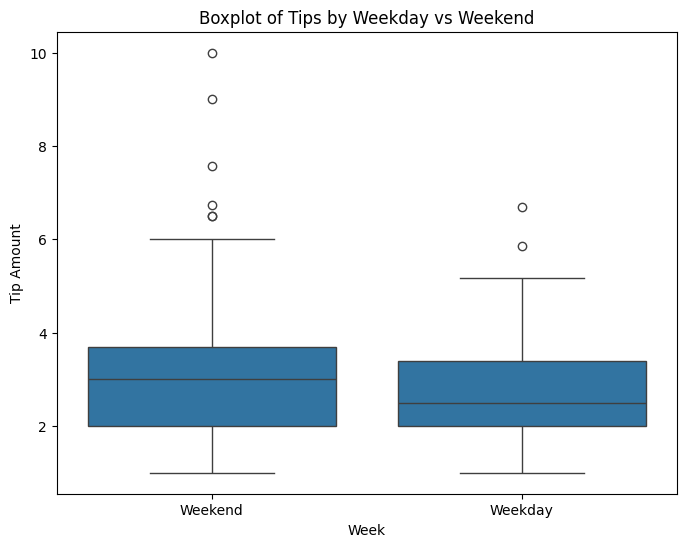

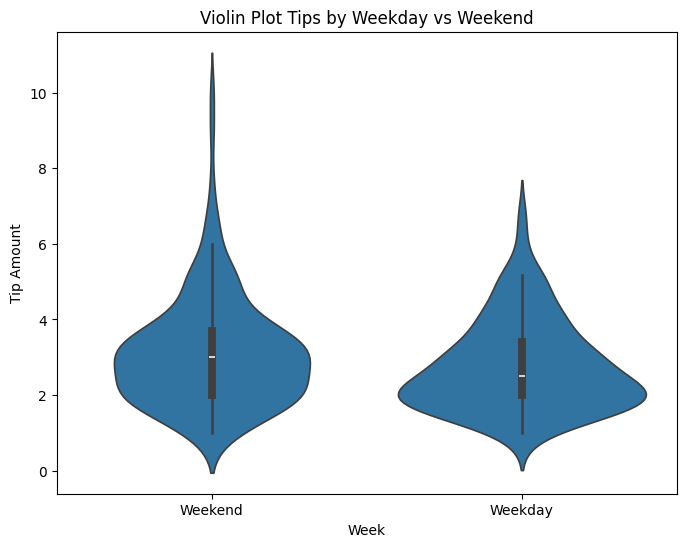

In [35]:
# Visualize the distrubution of tips for Weekdays and Weekends using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='weekend', y='tip', data= tips)
plt.title("Boxplot of Tips by Weekday vs Weekend")
plt.xlabel('Week')
plt.ylabel('Tip Amount')
plt.show()

# Violin plot to see the distrubtion and densisty of tips
plt.figure(figsize=(8,6))
sns.violinplot(x='weekend', y='tip', data=tips)
plt.title('Violin Plot Tips by Weekday vs Weekend')
plt.xlabel('Week')
plt.ylabel('Tip Amount')
plt.show()

## __Step 5: Interpretation of Results__
Let's interpret the results of the t-test and the visualzation.

Using the p-value from the t-test to determine if we can reject the null hypothesis. Using a significance level of .05


In [36]:
alpha = .05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in tip amounts between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in tip amounts between weekdays and weekends.")

Fail to reject the null hypothesis: There is no significant difference in tip amounts between weekdays and weekends.
